<a href="https://colab.research.google.com/github/MariaNatiele/Python_ML_Colab-Analise-dados/blob/main/seaborn_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

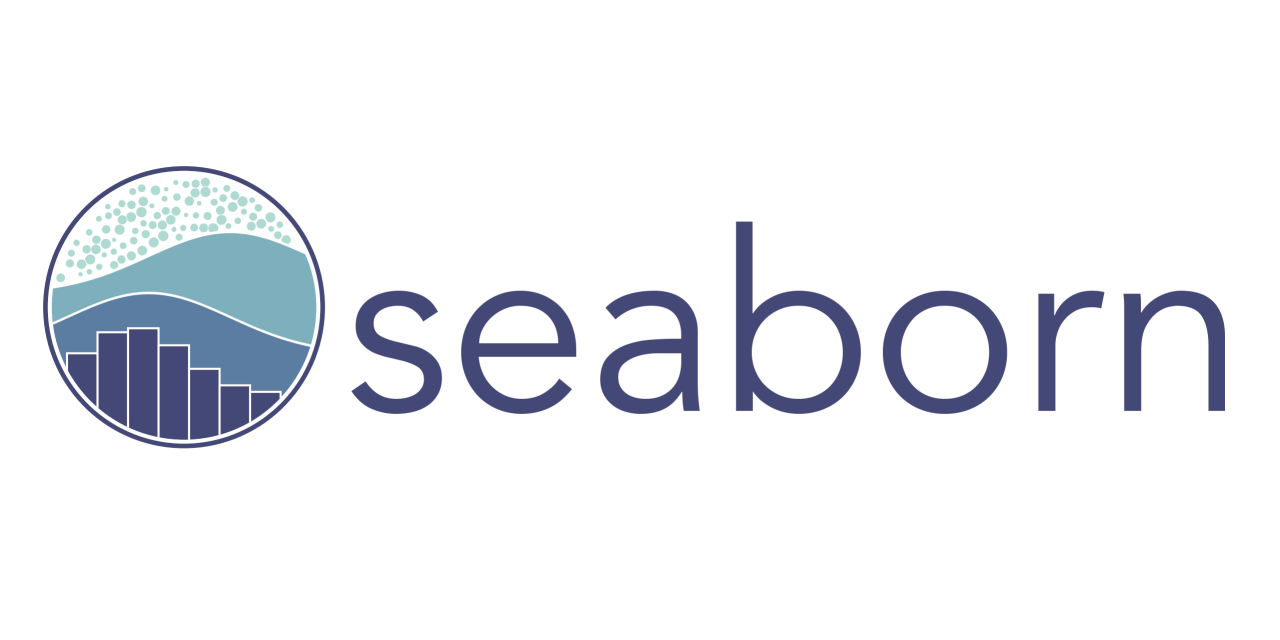

#Importando base de dados

In [ ]:
#importando a biblioteca Seabron
import seaborn as sn
import pandas as pd

In [ ]:
#importando a base de dados

from google.colab import files
dados = files.upload()

Saving tips.csv to tips.csv


In [ ]:
dados = pd.read_csv('tips.csv')


In [ ]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


#Tradução dos dados

In [ ]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [ ]:
renomear = {
    'total_bill': 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa' , 
    'day' : 'dia_da_semana', 
    'time': 'hora_do_dia', 
    'size' : 'total_de_pessoas'
}

In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
gorjetas = dados.rename(columns= renomear)


In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [ ]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
sim_nao = {
    'No' :'Não',
   'Yes' :'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [ ]:
#Atribuir a tradução ao gorjetas
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
#visualizar os dias da semana
gorjetas.head(1)


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [ ]:
dia = {
      'Sun': 'Domingo',
     'Sat': 'Sábado', 
     'Thur' : 'Quinta', 
     'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dia)

In [ ]:
gorjetas.head(1) 


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [ ]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
hora = {
    'Dinner' : 'Jantar',
     'Lunch' :'Almoço'
}

In [ ]:
gorjetas.hora_do_dia =  gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.hora_do_dia

0      Jantar
1      Jantar
2      Jantar
3      Jantar
4      Jantar
        ...  
239    Jantar
240    Jantar
241    Jantar
242    Jantar
243    Jantar
Name: hora_do_dia, Length: 244, dtype: object

#Instalando / Importando o Seabron

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

In [ ]:
#versão isnatlada 
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, pandas, scipy
Required-by: missingno


#Análise 1 -Valor da conta e da gorjeta

In [ ]:
#olhar as colunas
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

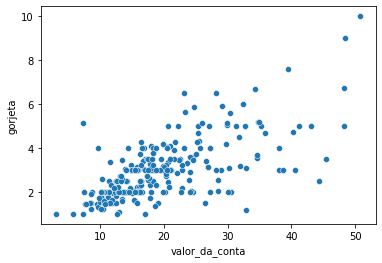

In [ ]:
#mostrando os dados de valor e gorjetas
valor_gorjeta = sns.scatterplot(x = 'valor_da_conta', y = 'gorjeta', data = gorjetas)

**Visualmente o valor da gorjeta aumenta conforme o valor da conta aumenta**

In [ ]:
#Quantidade de dados
print('A base tem {} registros \n'.format(gorjetas.shape[0]))
print('Registros ão nulos(not null)')
gorjetas.count()

A base tem 244 registros 

Registros ão nulos(not null)


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

##Criando o campo porcentagem

In [ ]:
#novo campo porcentagem recebe os dados da gorjetas divididos pelo valor da conta

gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head(1)


,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [ ]:
#casas decimais de gorjetas .round(2)

gorjetas.porcentagem = gorjetas.porcentagem

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


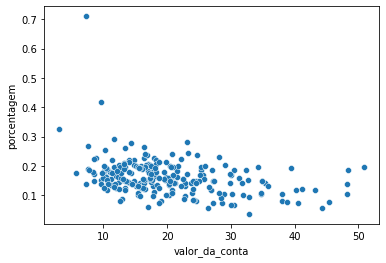

In [ ]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

**O valor da conta não é proporcional ao valor da gorjeta**

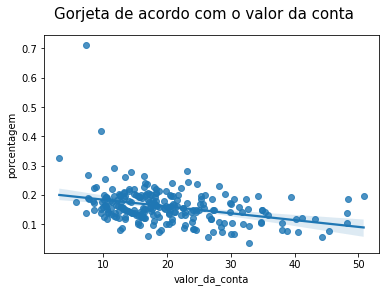

In [ ]:
#Gráfico de linha ??? kind = 'line' salvando a imagem e colocando titulo
porcentagem_conta_linha = sns.regplot(x='valor_da_conta',y='porcentagem',data=gorjetas)
porcentagem_conta_linha.get_title('right')
porcentagem_conta_linha.figure.suptitle('Gorjeta de acordo com o valor da conta ',fontsize = 15);


In [ ]:
imagem  = porcentagem_conta_linha.get_figure()


In [ ]:
imagem.savefig('imagem.png');

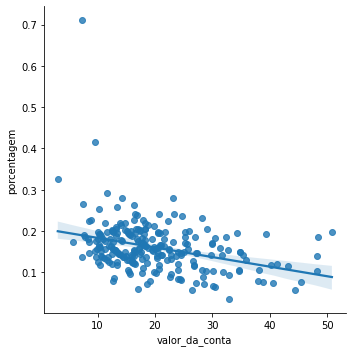

In [ ]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

#Análise 2 -Sobremessa

In [ ]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447


In [ ]:
#todos que pediram sobremesa com a describe 'descrição'
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163196
std,9.832154,1.401468,0.810751,0.085119
min,3.070000,1.000000,1.000000,0.035638
25%,13.420000,2.000000,2.000000,0.106771
50%,17.920000,3.000000,2.000000,0.153846
75%,26.860000,3.680000,3.000000,0.195059
max,50.810000,10.000000,5.000000,0.710345


In [ ]:
#todos não pediu a sobremesa descrição
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159328
std,8.255582,1.377190,1.017984,0.039910
min,7.250000,1.000000,1.000000,0.056797
25%,13.325000,2.000000,2.000000,0.136906
50%,17.590000,2.740000,2.000000,0.155625
75%,22.755000,3.505000,3.000000,0.185014
max,48.330000,9.000000,6.000000,0.291990


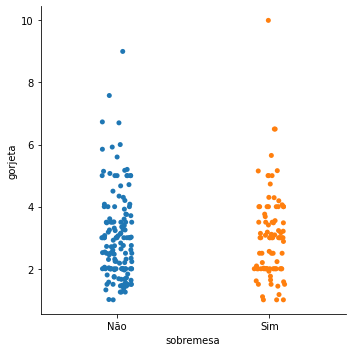

In [ ]:
#visualizando a análise
visualiza = sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

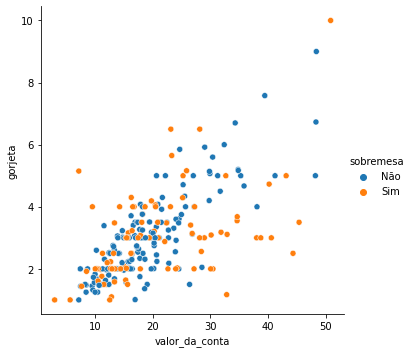

In [ ]:
#cadegorização entre sim e não de sobremesa hue
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',data=gorjetas);

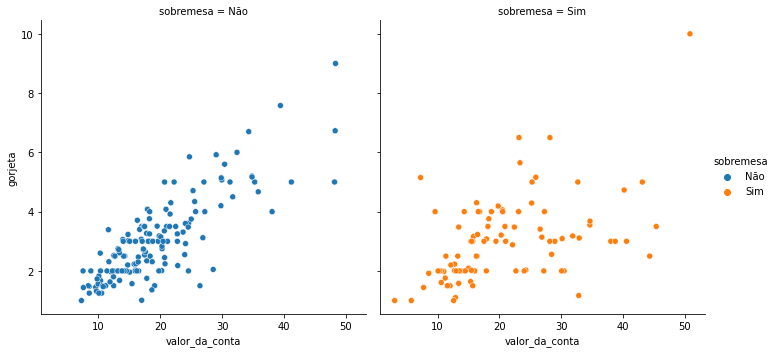

In [ ]:
#separa os que escolheram e os que não escolheram uma sobre mesa col 
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa',col = 'sobremesa',data=gorjetas);

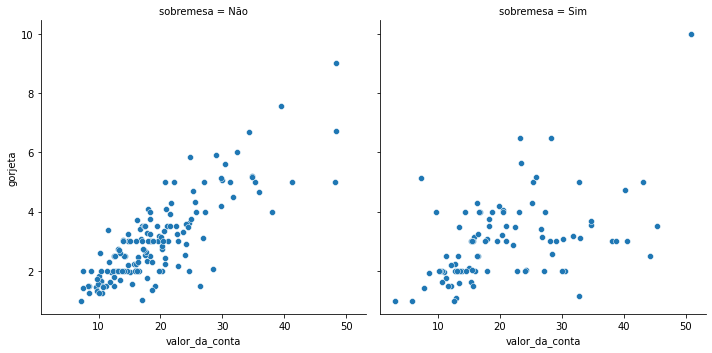

In [ ]:
#Com a mesma cor 
sns.relplot(x='valor_da_conta', y='gorjeta',col = 'sobremesa',data=gorjetas);

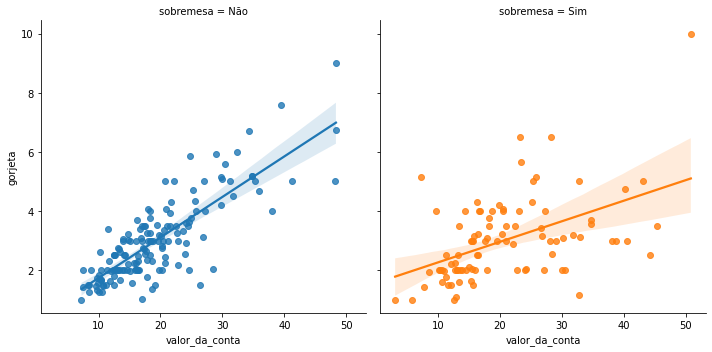

In [ ]:
#traçando uma linha
sns.lmplot(x='valor_da_conta', y='gorjeta',col = 'sobremesa', hue='sobremesa',data=gorjetas);

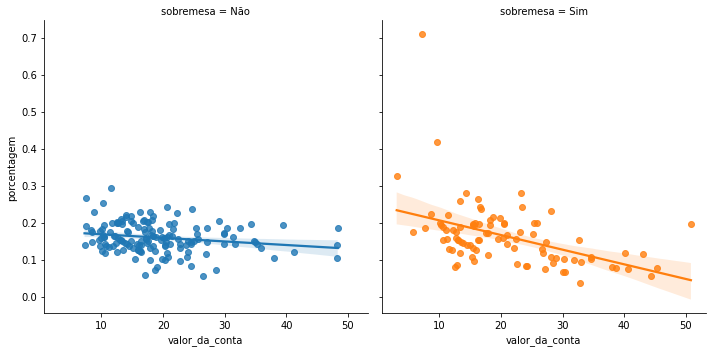

In [ ]:
#porcentagem 
sns.lmplot(x='valor_da_conta', y='porcentagem',col = 'sobremesa', hue='sobremesa',data=gorjetas);

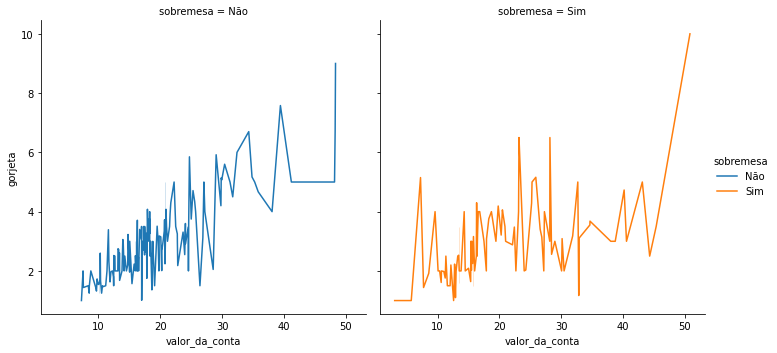

In [ ]:
#plotagem com linha com a gorjeta
sns.relplot(x='valor_da_conta', y='gorjeta',col = 'sobremesa',hue = 'sobremesa', kind = 'line',data=gorjetas);

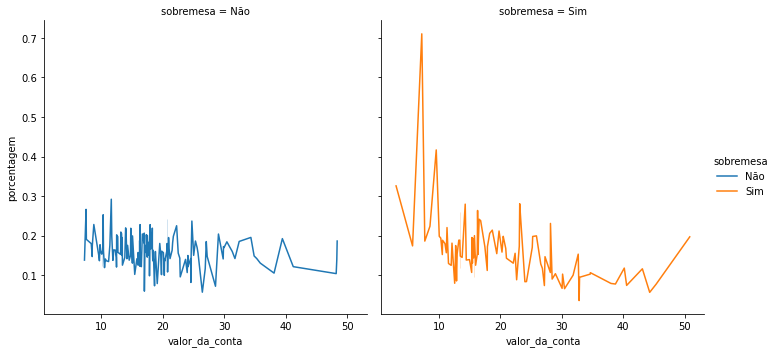

In [ ]:
#plotando com a porcentagem 
sns.relplot(x='valor_da_conta', y='porcentagem',col = 'sobremesa',hue = 'sobremesa', kind = 'line',data=gorjetas);

##Teste de hipótese 

**H<sup>null</sup>**
**A distribuição da taxa de gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
**A distribuição da taxa de gorjeta não é a mesma nos dois grupos**


In [ ]:
#biblioteca de análise 
from scipy.stats import ranksums

In [ ]:
#porcentagem da sobremesa
sobremesa = gorjetas.query("sobremesa == 'Sim' ").porcentagem

In [ ]:
#porcentagem de quem ficou sem sobremesa
sem_sobremesa = gorjetas.query("sobremesa == 'Não' ").porcentagem

In [ ]:
sem_sobremesa

0      0.059447
1      0.160542
2      0.166587
3      0.139780
4      0.146808
         ...   
235    0.124131
238    0.130338
239    0.203927
242    0.098204
243    0.159744
Name: porcentagem, Length: 151, dtype: float64

In [ ]:
sobremesa

56     0.078927
58     0.156584
60     0.158206
61     0.144823
62     0.179673
         ...   
234    0.193175
236    0.079365
237    0.035638
240    0.073584
241    0.088222
Name: porcentagem, Length: 93, dtype: float64

In [ ]:
#diferença????
resposta = ranksums(sobremesa,sem_sobremesa)

In [ ]:
print('O valor do pvalue é {}'.format(resposta.pvalue))

O valor do pvalue é 0.5601068283978767


In [ ]:
print('O valor do statistic é {}'.format(resposta.statistic))

O valor do statistic é -0.5826828381528689


**H<sup>null</sup>**
**A distribuição da taxa de gorjeta é a mesma nos dois grupos**

**visulamente existe uma diferenção entre aqueles que pediram uma sobre mesa e os que não pediram sobremesa**

# Análise dias da semana

In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

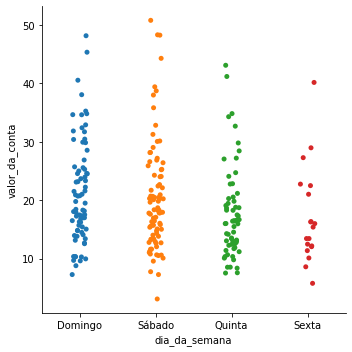

In [ ]:
#categorico dias e valor da conta
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

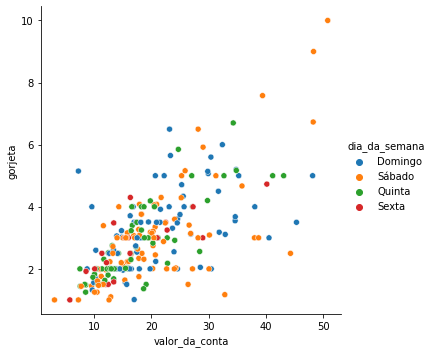

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'dia_da_semana',data=gorjetas)

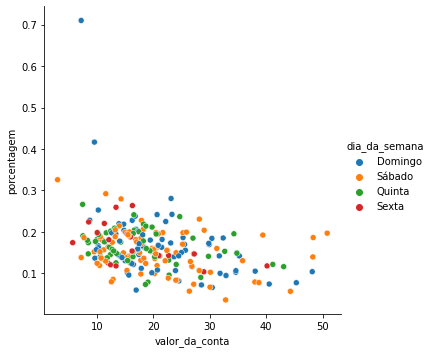

In [ ]:
#dias da semana e a porcentagem
sns.relplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana',data=gorjetas)

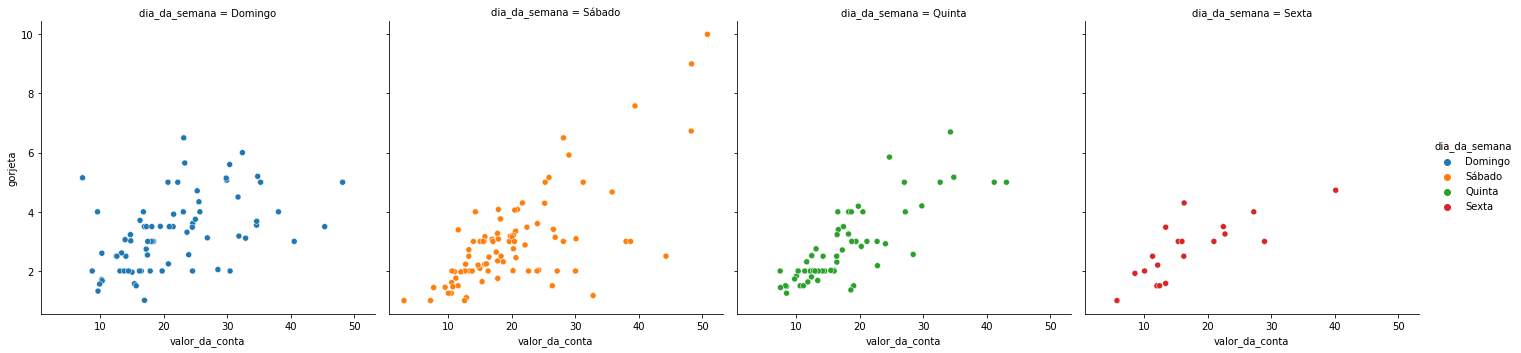

In [ ]:
#Cada dia da semana conforme vendas 
sns.relplot(x='valor_da_conta', y='gorjeta', hue = 'dia_da_semana',col='dia_da_semana',data=gorjetas);

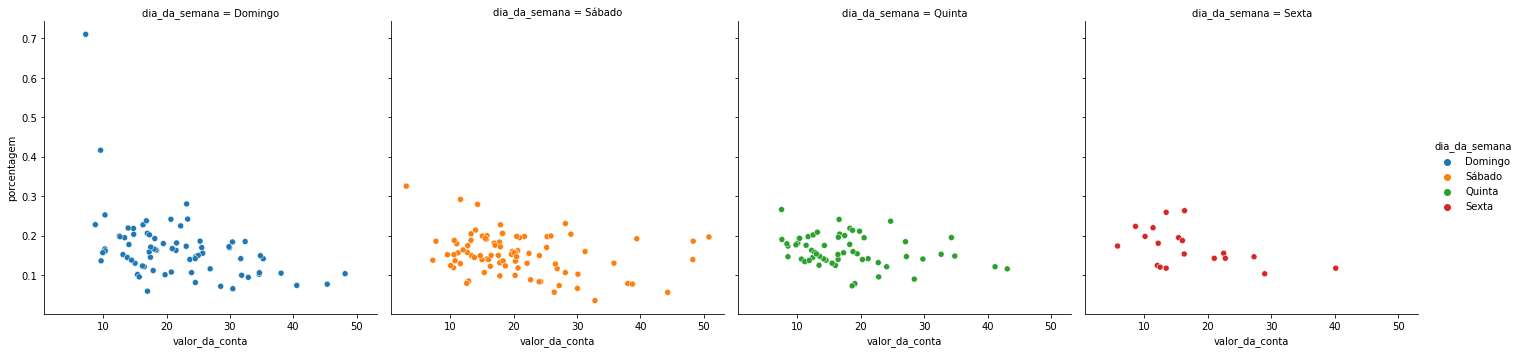

In [ ]:
#porcentagem por cada dia da semana
sns.relplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana',col='dia_da_semana',data=gorjetas);

In [ ]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas', 'porcentagem'],
      dtype='object')

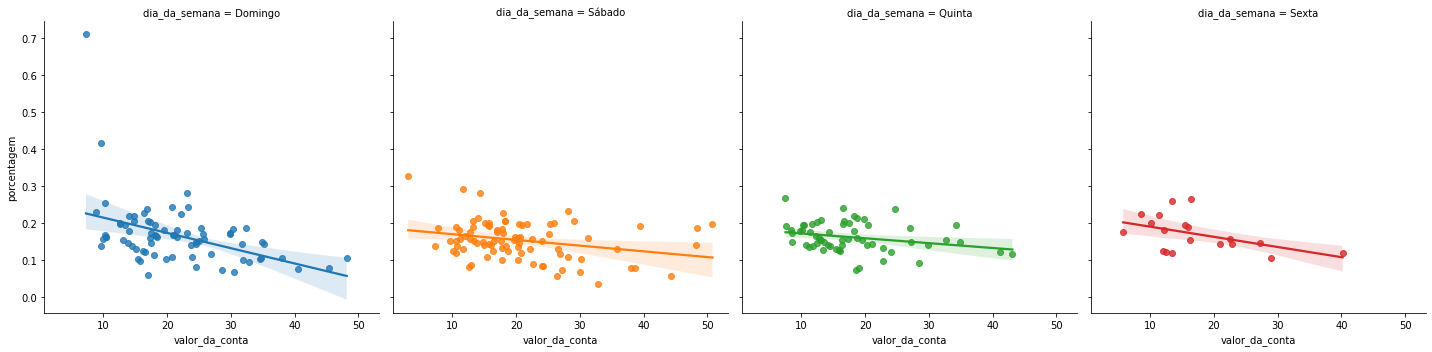

In [ ]:
#traçando uma linha no grafico a coma 
sns.lmplot(x='valor_da_conta', y='porcentagem', hue = 'dia_da_semana',col='dia_da_semana',data=gorjetas);

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas {} arredondada'.format(media_geral_gorjetas.round()))

A média geral das gorjetas 3.0 arredondada


In [ ]:
print('A média geral das gorjetas {}'.format(media_geral_gorjetas))

A média geral das gorjetas 2.99827868852459


In [ ]:
#média dos dias da semana, mostrar só os campos necessários
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166897
Quinta,17.682742,2.771452,0.161276
Sexta,17.151579,2.734737,0.169913
Sábado,20.441379,2.993103,0.153152


In [ ]:
#frequência
frequencia = gorjetas.dia_da_semana.value_counts()
print('Frequência dos dias\n {}'.format(frequencia))

Frequência dos dias
 Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

##Teste de hipotese

**H<sup>null</sup>**
##A distribuição de conta é igual no sábado e no domingo

**H<sup>alt</sup>**
##A distribuição de conta é diferente no sábado e no domingo



In [ ]:
#domingo valor da conta
conta_domingo = gorjetas.query("dia_da_semana == 'Domingo' ").valor_da_conta

In [ ]:
conta_sabado = gorjetas.query("dia_da_semana == 'Sábado' ").valor_da_conta

In [ ]:
#valor de diferença entre as contas
r2 = ranksums(conta_domingo, conta_sabado)


In [ ]:
print('o valor do p-value é {} '.format(r2.pvalue))

o valor do p-value é 0.3576728477868443 


**deste modo ficamos com a hipótese nula onde os sábados e domingos são iguais o valor da conta**

#Análise 4  - Hora do dia

In [ ]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

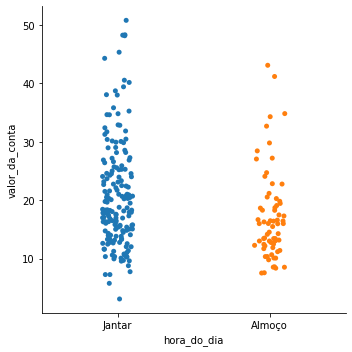

In [ ]:
#categorico horas do dia 
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas);

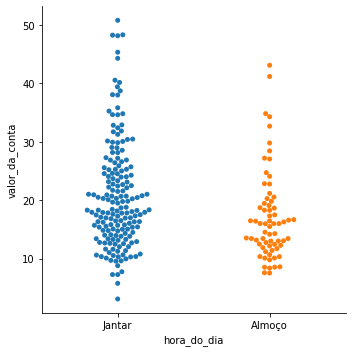

In [ ]:
#kind= 'swarm' o que faz?? mehora a visualização dos pontos
sns.catplot(x='hora_do_dia', y='valor_da_conta',kind= 'swarm', data=gorjetas)

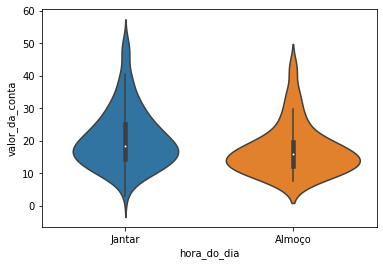

In [ ]:
#gráfico tipo violin
sns.violinplot(x='hora_do_dia', y= 'valor_da_conta', data=gorjetas);

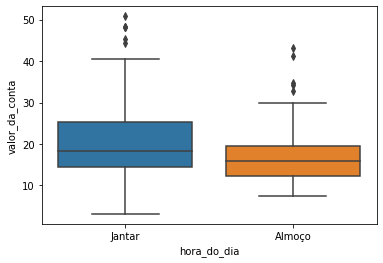

In [ ]:
#outro tipo
sns.boxplot(x='hora_do_dia', y= 'valor_da_conta', data=gorjetas);

In [ ]:
#valor da conta no almoço
almoco = gorjetas.query("hora_do_dia == 'Almoço' ").valor_da_conta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


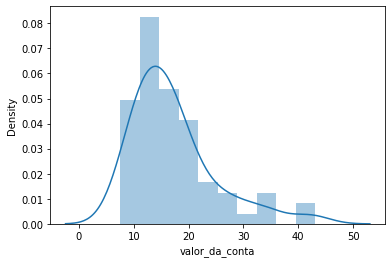

In [ ]:
sns.distplot(almoco);

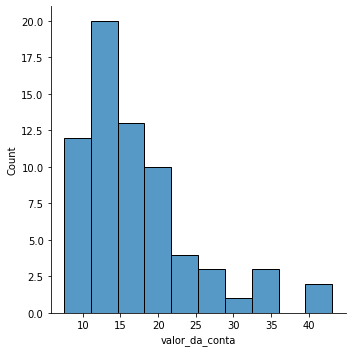

In [ ]:
sns.displot(almoco, kde= False);

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar' ").valor_da_conta

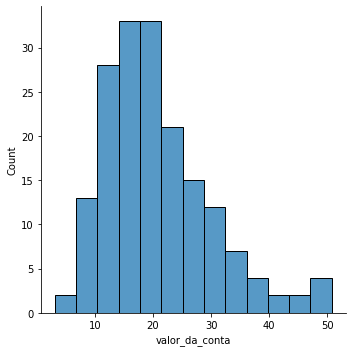

In [ ]:
#jantar
sns.displot(jantar);

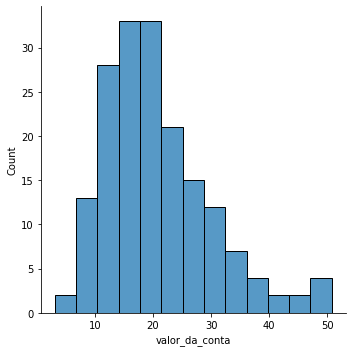

In [ ]:
sns.displot(jantar, kde = False);

In [ ]:
#media do grupo de hora do dia 
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.164128
Jantar,20.797159,3.102670,0.159518


#Teste Hipótese

**H<sup>null</sup>**
##A distribuição de conta é igual no jantar e no almoço

**H<sup>alt</sup>**
##A distribuição de conta é diferente no jantar e no almoço

In [ ]:
r3 = ranksums(jantar, almoco)

In [ ]:
print('o valor do p-value é {}'.format(r3.pvalue))

o valor do p-value é 0.0011791039723641672



**H<sup>alt</sup>**
##A distribuição de conta é diferente no jantar e no almoço

#Teste de hipotese 5

**H<sup>null</sup>**
##A distribuição da gorjeta é igual no jantar e no almoço

**H<sup>alt</sup>**
##A distribuição da gorjeta é diferente no jantar e no almoço

In [ ]:
#porcentagem do almoço
por_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [ ]:
por_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [ ]:
#ver se a porcentegem é igual 
r4 = ranksums(por_almoco,por_jantar )

In [ ]:
print('o valor do p-value é {}'.format(r4.pvalue))

o valor do p-value é 0.23027859883366675
